# Predicting Flaring Emissions with Ali: A Journey Through Oil Rig Data & Random Forest Regression
# Introduction: Meet Ali, the Carbon Tracker
Ali is part of ADNOC's upstream operations team, and his job is to monitor and predict flaring emissions using advanced data techniques. Ali knows that predicting emissions is not just about collecting raw data from the rigs—he needs to preprocess it, add insightful calculated features, and train a machine learning model to optimize operations. By doing this, Ali helps ADNOC reduce emissions, comply with regulations, and operate efficiently.

Join Ali as he walks us through the process of turning raw rig data into actionable insights using a Random Forest Regressor to predict emissions and optimize flaring activities.

# 1. Setting the Stage: Importing Ali’s Toolbox
Before Ali can start analyzing the data, he needs his toolbox in place. This toolbox contains the essential Python libraries for data manipulation, numerical calculations, and building machine learning models.

In [1]:
# Step 1: Importing essential libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical calculations
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.ensemble import RandomForestRegressor  # Model to predict emissions
from sklearn.preprocessing import StandardScaler  # To normalize data
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
import matplotlib.pyplot as plt  # For visualizing feature importance

# Silence warnings for a cleaner output
import warnings
warnings.filterwarnings("ignore")

**Technical Insight:** Ali uses Pandas for data handling, NumPy for numerical operations, and Scikit-learn for model building and evaluation.

**Business Insight:** Having the right tools helps Ali make informed decisions that minimize emissions and improve operational efficiency.

# 2. Loading the Flaring Data: Tracking Emissions from the Rigs
Ali now loads the data from the flaring activities. This dataset includes key features such as production volume, gas flaring rate, and equipment health that are critical for predicting flaring emissions.

In [ ]:
# Step 2: Loading the flaring dataset
df = pd.read_csv("adnoc_flaring_emissions_data.csv")

# Display the first few rows to ensure the data is loaded correctly
print("First five rows of the dataset:")
print(df.head())

**Technical Insight:** Ali uses Pandas to load and inspect the flaring data.

**Business Insight:** This data gives ADNOC valuable insights into rig operations and their environmental impact, making it essential for minimizing emissions.

# 3. Preprocessing the Data: Cleaning and Preparing the Features
Before Ali can predict emissions, he needs to clean and preprocess the data. This includes selecting relevant features and normalizing the values for better model performance.

In [3]:
# Step 3: Preprocessing the data
# Drop unnecessary columns (Date_Time and Rig_ID)
df.drop(columns=['Date_Time', 'Rig_ID'], inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=['Predicted_Emissions_tonnes'])
y = df['Predicted_Emissions_tonnes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Technical Insight: **Ali drops unnecessary columns and scales the features so the machine learning model performs better.

**Business Insight:** Preparing the data properly helps ensure that the predictions are accurate, allowing ADNOC to plan better for emission reductions.

# 4. Building and Training the Random Forest Model: Predicting Emissions
Ali now builds his machine learning model using a Random Forest Regressor. This model will learn from the training data and make predictions about future flaring emissions based on operational data.

In [4]:
# Step 4: Building and training the Random Forest model
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2529786412.212613
R-squared (R2): 0.95609142357174


**Technical Insight:** Ali uses Random Forest, a powerful machine learning algorithm, to predict emissions based on various operational features.

**Business Insight:** By predicting emissions, ADNOC can proactively reduce flaring activities, improving both regulatory compliance and environmental impact.

# 5. Analyzing Feature Importance: Understanding What Drives Emissions
After training the model, Ali takes a closer look at which features have the most significant impact on predicting emissions. This helps ADNOC focus on the most important aspects of their operations.

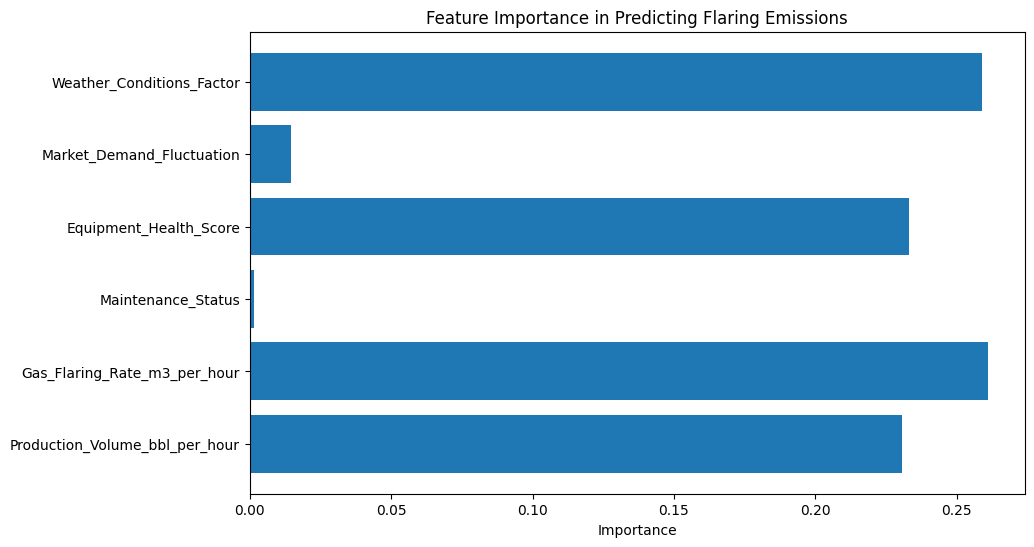

In [5]:
# Step 5: Analyzing feature importance
importance = rf_model.feature_importances_
features = X.columns

# Visualize the feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance in Predicting Flaring Emissions")
plt.barh(features, importance)
plt.xlabel("Importance")
plt.show()

**Technical Insight:** Ali uses feature importance to see which operational factors, such as equipment health or gas flaring rates, are most critical in determining emissions.

**Business Insight:** Knowing what drives emissions allows ADNOC to target those areas for improvement, reducing overall flaring.

# 6. Predicting Emissions for New Data: Ali’s Real-Time Optimization
Ali can now use the trained model to predict emissions for new data, helping ADNOC optimize operations in real-time.

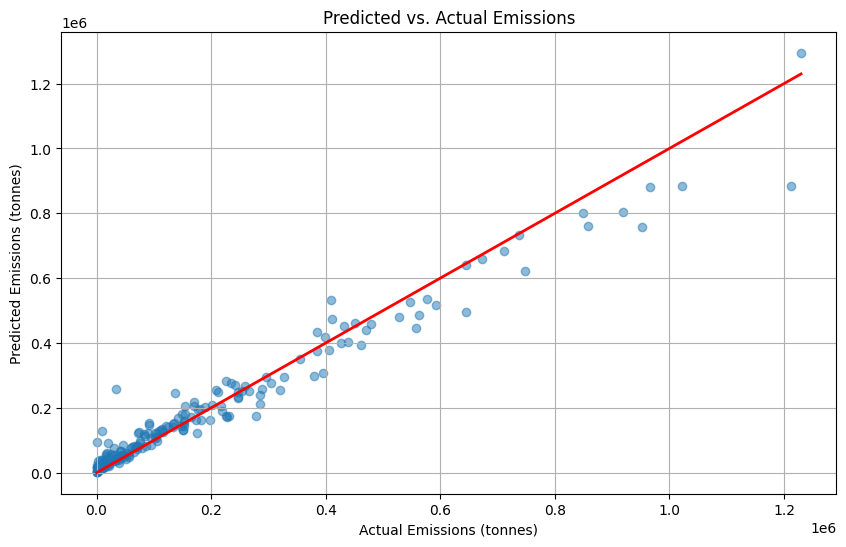

In [9]:
#  Visualizing predicted vs actual emissions

import matplotlib.pyplot as plt

# Scatter plot for predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Predicted vs. Actual Emissions')
plt.xlabel('Actual Emissions (tonnes)')
plt.ylabel('Predicted Emissions (tonnes)')
plt.grid(True)
plt.show()

**Technical Insight:**

The scatter plot shows how well the model’s predicted values match the actual values. Ideally, all points should fall on the red diagonal line, indicating perfect predictions.
The residual plot shows the errors (residuals) between the actual and predicted values. If the residuals are randomly scattered around zero, the model is well-calibrated.

**Business Insight:**

Visualizing the predicted vs. actual emissions gives ADNOC insight into the accuracy of their predictions, helping them refine operations and minimize any prediction errors for better emission management.

**Visual Explanation of Plots:**

This plot compares the predicted emissions with the actual emissions. The closer the points are to the red diagonal line, the better the model's predictions.

In [10]:
# Predicting emissions for new data
new_data = pd.DataFrame({
    'Production_Volume_bbl_per_hour': [4500],
    'Gas_Flaring_Rate_m3_per_hour': [350],
    'Maintenance_Status': [0],
    'Equipment_Health_Score': [0.85],
    'Market_Demand_Fluctuation': [1.05],
    'Weather_Conditions_Factor': [0.6]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict emissions
predicted_emission = rf_model.predict(new_data_scaled)
print(f"Predicted Emission: {predicted_emission[0]:.2f} tonnes")





Predicted Emission: 148213.84 tonnes


**Technical Insight:** Ali uses the trained model to predict flaring emissions for new operational conditions.

**Business Insight:** Real-time predictions allow ADNOC to adjust their operations dynamically, minimizing emissions and improving efficiency.

# Conclusion: Ali’s Journey in Optimizing Flaring Emissions
By combining data preprocessing, machine learning, and feature importance analysis, Ali has helped ADNOC predict and reduce flaring emissions. This journey shows the power of data-driven decisions in optimizing upstream oil and gas operations for both environmental and economic benefits.